In [1]:
import extFunc as ext
import matplotlib.pyplot as plt
import numpy as np
from importlib import import_module
import pandas as pd 
import cobra
import optlang
import copy 
import random
plt.rcParams.update({'font.size': 18})


In [2]:
#Load Models if not already in RAM

#nameList = ['iJN1462_GLC_UR10_9.xml' , 'iJN1462_GLC_UR6_3.xml', 'iJN1462_GLN_UR5_1.xml', 'iJN1462_GLC_UR7_3.xml' , 'iJN1462_OCT_UR3_4.xml']
nameList = ['iJN1462_GLC_UR6_3.xml' , 'iJN1462_OCT_UR3_4.xml']
#nameList = ['iJN1462_OCT_UR3_4.xml']

if 'modelDict' not in locals():
    modelDict = ext.ImportFunction(nameList)

    

Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.000e+00  ratio =  1.000e+00
Problem data seem to be well scaled


In [3]:
octanoate_uptake = np.linspace(0.1,5,50)*(-1)

reactionName    =   'EX_glc__D_e'
carbonSource    =   'EX_glc__D_e'
solutionDict    =   {}
solList         =   []

#Reactions of interest
col= [
        'EX_octa_e','EX_glc__D_e','BIOMASS_KT2440_WT3',
        'ATPS4rpp','PYK','PPK', 'PPK2','PGK',
        'EX_h_e', 'EX_o2_e','EX_nh4_e',
        'DM_C100aPHA_c','DM_C100pPHA_c','DM_C120aPHA_c',
        'DM_C60aPHA_c',  'DM_C60pPHA_c' , 'DM_C80aPHA_c','DM_C80pPHA_c',
        'EX_co2_e','EX_R_3hocta_e',
        'EX_glcn_e', 'EX_lac__D_e',
        'EX_acac_e','EX_ac_e'       
    ]
    
df = pd.DataFrame(columns=col)

for fluxValue in octanoate_uptake:
   with modelDict['iJN1462_GLC_UR6_3'] as model:
       
        model.reactions.EX_o2_e.lower_bound  = -13.5
        model.reactions.EX_o2_e.upper_bound  = 0

        model.reactions.EX_nh4_e.lower_bound  = -3.1
        model.reactions.EX_nh4_e.upper_bound  = 0

        getattr(model.reactions, reactionName).upper_bound = 0
        getattr(model.reactions, reactionName).lower_bound = fluxValue
        getattr(model.reactions, reactionName).upper_bound = fluxValue

        solList.append(cobra.flux_analysis.pfba(model).fluxes[col])
        solutionDict[fluxValue]= cobra.flux_analysis.pfba(model)
    

df = pd.DataFrame(solList, columns=col)


x               = abs(df[carbonSource])
bs              = df['BIOMASS_KT2440_WT3']
bsYield         = bs/x

pha             = abs(df['DM_C100aPHA_c']) + abs(df['DM_C100pPHA_c']) + abs(df['DM_C120aPHA_c']) + abs(df['DM_C60aPHA_c']) + \
                  abs(df['DM_C60pPHA_c']) + abs(df['DM_C80pPHA_c']) + abs(df['DM_C80aPHA_c'])
pha_Yield       = pha/x

energy          = abs(df['ATPS4rpp']) + abs(df['PYK']) + abs(df['PPK'])+ abs(df['PPK2'])+ abs(df['PGK'])
energy_Yield    = energy/x

co2             = df['EX_co2_e']
co2_Yield       = co2/x

hocta_e         = abs(df['EX_R_3hocta_e'])
hocta_e_Yield   = hocta_e/x

acac            = abs(df['EX_acac_e'])
acac_Yield      = acac/x

glcn            = abs(df['EX_glcn_e'])
glcn_Yield      = glcn/x

ac            = abs(df['EX_ac_e'])
ac_Yield      = ac/x


fig, (row1, row2) = plt.subplots(nrows=2,ncols=3,figsize=(20,10))
(ax1, ax2, ax3) = row1
(ax4 ,ax5, ax6) = row2

ax1_2 = ax1.twinx()
ax1.plot(x, bs      , 'g-')
ax1_2.plot(x, bsYield , 'b-')
ax1.set_xlabel(carbonSource)
ax1.set_ylabel('biomass', color='g')
ax1_2.set_ylabel('biomass/c-source', color='b')

ax2_2 = ax2.twinx()
ax2.plot(x, pha      , 'g-')
ax2_2.plot(x, pha_Yield , 'b-')
ax2.set_xlabel(carbonSource)
ax2.set_ylabel('pha', color='g')
ax2_2.set_ylabel('pha/c-source', color='b')

ax3_2 = ax3.twinx()
ax3.plot(x, energy      , 'g-')
ax3_2.plot(x, energy_Yield , 'b-')
ax3.set_xlabel(carbonSource)
ax3.set_ylabel('energy', color='g')
ax3_2.set_ylabel('energy/c-source', color='b')
plt.tight_layout()

ax4_2 = ax4.twinx()
ax4.plot(x, co2      , 'g-')
ax4_2.plot(x, co2_Yield , 'b-')
ax4.set_xlabel(carbonSource)
ax4.set_ylabel('co2', color='g')
ax4_2.set_ylabel('co2y/c-source', color='b')
plt.tight_layout()

ax5_2 = ax5.twinx()
ax5.plot(x, ac      , 'g-')
ax5_2.plot(x, ac_Yield , 'b-')
ax5.set_xlabel(carbonSource)
ax5.set_ylabel('ac_e', color='g')
ax5_2.set_ylabel('ac_e/c-source', color='b')
plt.tight_layout()

ax6_2 = ax6.twinx()
ax6.plot(x, glcn      , 'g-')
ax6_2.plot(x, glcn_Yield , 'b-')
ax6.set_xlabel(carbonSource)
ax6.set_ylabel('glcn', color='g')
ax6_2.set_ylabel('glcn/c-source', color='b')
plt.tight_layout()
plt.show()

In [5]:
octanoate_uptake = np.linspace(0.25,20,50)*(-1)

reactionName    =   'EX_o2_e'
carbonSource    =   'EX_glc__D_e'
xAxis           = reactionName
solutionDict    =   {}
solList         =   []

#Reactions of interest
col= [
        'EX_octa_e','EX_glc__D_e','BIOMASS_KT2440_WT3',
        'ATPS4rpp','PYK','PPK', 'PPK2','PGK',
        'EX_h_e', 'EX_o2_e','EX_nh4_e',
        'DM_C100aPHA_c','DM_C100pPHA_c','DM_C120aPHA_c',
        'DM_C60aPHA_c',  'DM_C60pPHA_c' , 'DM_C80aPHA_c','DM_C80pPHA_c',
        'EX_co2_e','EX_R_3hocta_e',
        'EX_glcn_e', 'EX_lac__D_e',
        'EX_acac_e','EX_ac_e'       
    ]
    
df = pd.DataFrame(columns=col)

for fluxValue in octanoate_uptake:
    with modelDict['iJN1462_GLC_UR6_3'] as model:

        model.reactions.EX_glc__D_e.lower_bound  = -3.4*2
        model.reactions.EX_glc__D_e.upper_bound  = -3.4*2
        model.reactions.EX_nh4_e.lower_bound  = -3.1
        model.reactions.EX_nh4_e.upper_bound  = 0  
        getattr(model.reactions, reactionName).upper_bound = 0
        getattr(model.reactions, reactionName).lower_bound = fluxValue
        getattr(model.reactions, reactionName).upper_bound = fluxValue
        
        solList.append(cobra.flux_analysis.pfba(model).fluxes[col])
        solutionDict[fluxValue]= cobra.flux_analysis.pfba(model)
    


df = pd.DataFrame(solList, columns=col)


x               =   abs(df[reactionName])
c           =   abs(df[carbonSource])

bs              = df['BIOMASS_KT2440_WT3']
bsYield         = bs/c

pha             = abs(df['DM_C100aPHA_c']) + abs(df['DM_C100pPHA_c']) + abs(df['DM_C120aPHA_c']) + abs(df['DM_C60aPHA_c']) + \
                  abs(df['DM_C60pPHA_c']) + abs(df['DM_C80pPHA_c']) + abs(df['DM_C80aPHA_c'])
pha_Yield       = pha/c         

energy          = abs(df['ATPS4rpp']) + abs(df['PYK']) + abs(df['PPK'])+ abs(df['PPK2'])+ abs(df['PGK'])
energy_Yield    = energy/c

co2             = df['EX_co2_e']
co2_Yield       = co2/c

hocta_e         = abs(df['EX_R_3hocta_e'])
hocta_e_Yield   = hocta_e/c

acac            = abs(df['EX_acac_e'])
acac_Yield      = acac/c

glcn            = abs(df['EX_glcn_e'])
glcn_Yield      = glcn/c

ac            = abs(df['EX_ac_e'])
ac_Yield      = ac/c


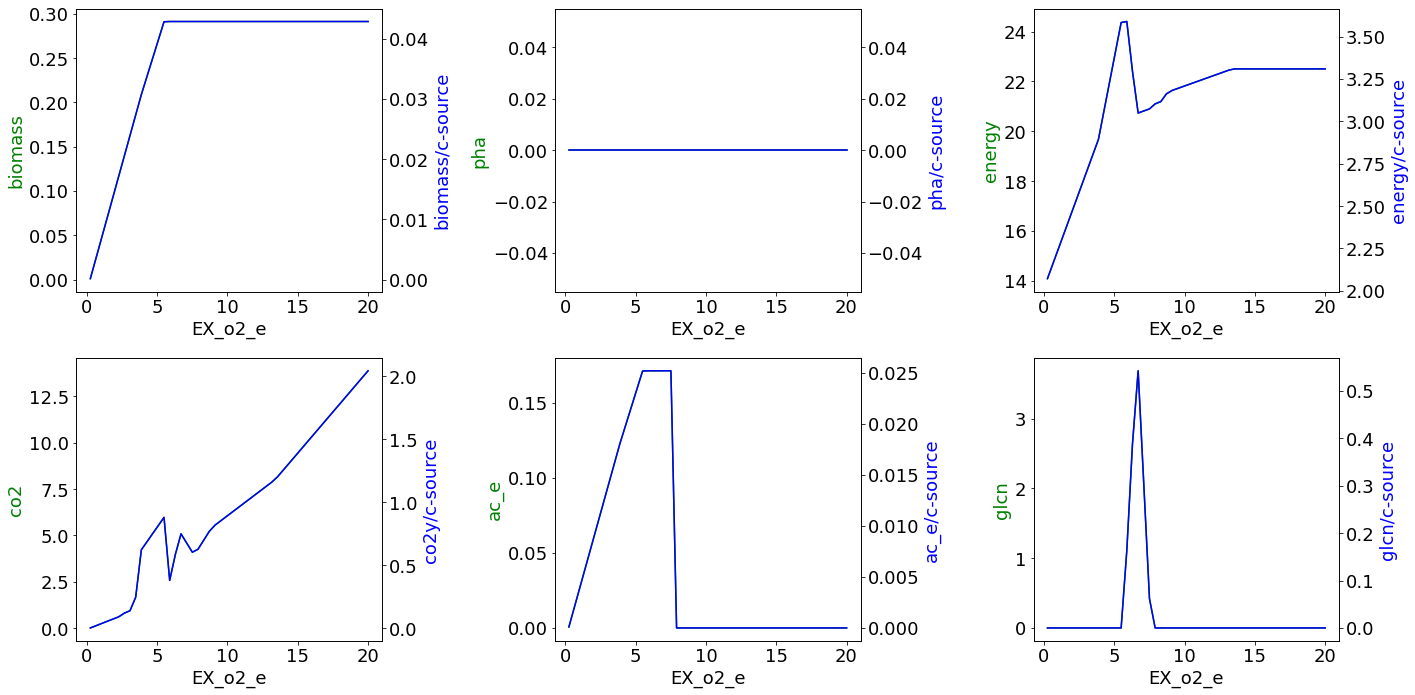

In [6]:


fig, (row1, row2) = plt.subplots(nrows=2,ncols=3,figsize=(20,10))
(ax1, ax2, ax3) = row1
(ax4 ,ax5, ax6) = row2

ax1_2 = ax1.twinx()
ax1.plot(x, bs      , 'g-')
ax1_2.plot(x, bsYield , 'b-')
ax1.set_xlabel(reactionName)
ax1.set_ylabel('biomass', color='g')
ax1_2.set_ylabel('biomass/c-source', color='b')

ax2_2 = ax2.twinx()
ax2.plot(x, pha      , 'g-')
ax2_2.plot(x, pha_Yield , 'b-')
ax2.set_xlabel(reactionName)
ax2.set_ylabel('pha', color='g')
ax2_2.set_ylabel('pha/c-source', color='b')

ax3_2 = ax3.twinx()
ax3.plot(x, energy      , 'g-')
ax3_2.plot(x, energy_Yield , 'b-')
ax3.set_xlabel(reactionName)
ax3.set_ylabel('energy', color='g')
ax3_2.set_ylabel('energy/c-source', color='b')
plt.tight_layout()

ax4_2 = ax4.twinx()
ax4.plot(x, co2      , 'g-')
ax4_2.plot(x, co2_Yield , 'b-')
ax4.set_xlabel(reactionName)
ax4.set_ylabel('co2', color='g')
ax4_2.set_ylabel('co2y/c-source', color='b')
plt.tight_layout()

ax5_2 = ax5.twinx()
ax5.plot(x, ac      , 'g-')
ax5_2.plot(x, ac_Yield , 'b-')
ax5.set_xlabel(reactionName)
ax5.set_ylabel('ac_e', color='g')
ax5_2.set_ylabel('ac_e/c-source', color='b')
plt.tight_layout()

ax6_2 = ax6.twinx()
ax6.plot(x, glcn      , 'g-')
ax6_2.plot(x, glcn_Yield , 'b-')
ax6.set_xlabel(reactionName)
ax6.set_ylabel('glcn', color='g')
ax6_2.set_ylabel('glcn/c-source', color='b')
plt.tight_layout()
plt.show()

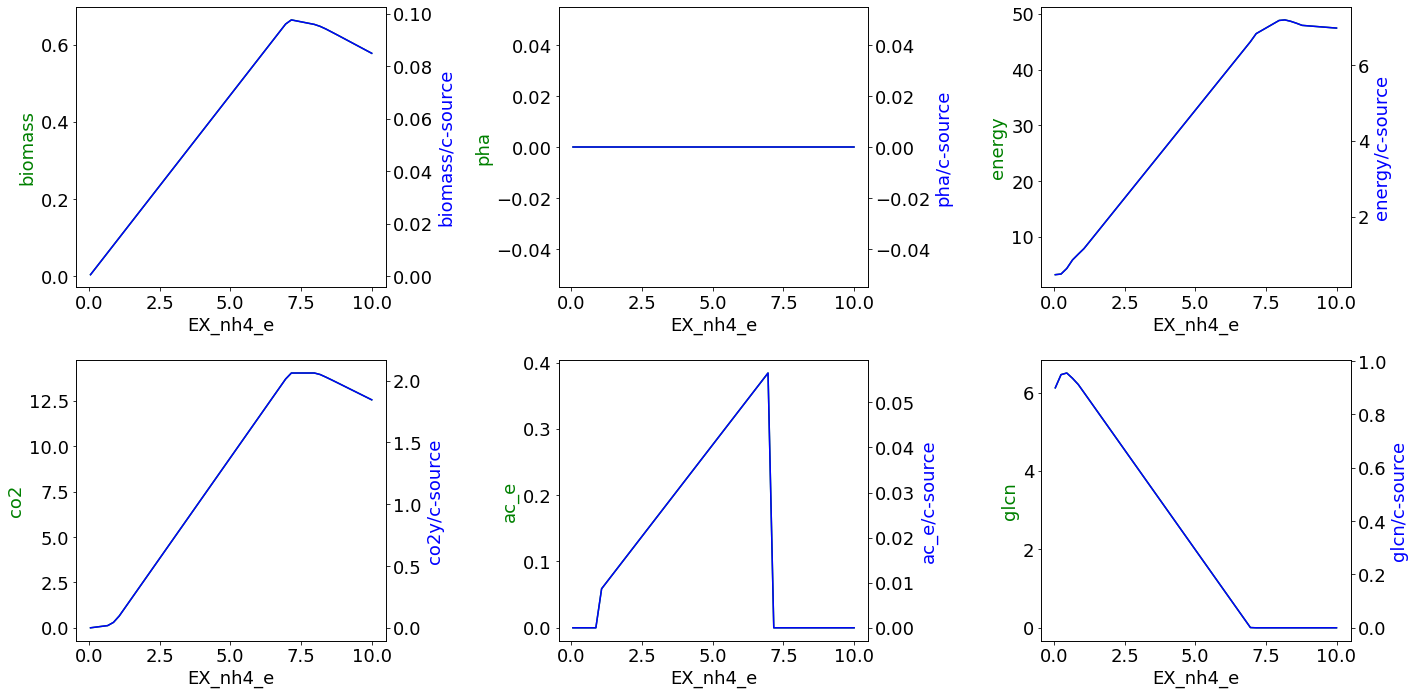

In [7]:
octanoate_uptake = np.linspace(0.05,10,50)*(-1)

reactionName    =   'EX_nh4_e'
carbonSource    =   'EX_glc__D_e'
xAxis           = reactionName
solutionDict    =   {}
solList         =   []

#Reactions of interest
col= [
    'EX_octa_e','EX_glc__D_e','BIOMASS_KT2440_WT3',
    'ATPS4rpp','PYK','PPK', 'PPK2','PGK',
    'EX_h_e', 'EX_o2_e','EX_nh4_e',
    'DM_C100aPHA_c','DM_C100pPHA_c','DM_C120aPHA_c',
    'DM_C60aPHA_c',  'DM_C60pPHA_c' , 'DM_C80aPHA_c','DM_C80pPHA_c',
    'EX_co2_e','EX_R_3hocta_e',
    'EX_glcn_e', 'EX_lac__D_e',
    'EX_acac_e','EX_ac_e'       
    ]

df = pd.DataFrame(columns=col)
for fluxValue in octanoate_uptake:
    with modelDict['iJN1462_GLC_UR6_3'] as model:

        model.reactions.EX_glc__D_e.lower_bound  = -3.4*2
        model.reactions.EX_glc__D_e.upper_bound  = -3.4*2
        model.reactions.EX_o2_e.upper_bound  = 0
        model.reactions.EX_o2_e.lower_bound  = -13.5
        getattr(model.reactions, reactionName).upper_bound = 0
        getattr(model.reactions, reactionName).lower_bound = fluxValue
        getattr(model.reactions, reactionName).upper_bound = fluxValue
        
        solList.append(cobra.flux_analysis.pfba(model).fluxes[col])
        solutionDict[fluxValue]= cobra.flux_analysis.pfba(model)
    
df = pd.DataFrame(solList, columns=col)


x               =   abs(df[reactionName])
c               =   abs(df[carbonSource])

bs              = df['BIOMASS_KT2440_WT3']
bsYield         = bs/c

pha             = abs(df['DM_C100aPHA_c']) + abs(df['DM_C100pPHA_c']) + abs(df['DM_C120aPHA_c']) + abs(df['DM_C60aPHA_c']) + \
                  abs(df['DM_C60pPHA_c']) + abs(df['DM_C80pPHA_c']) + abs(df['DM_C80aPHA_c'])
pha_Yield       = pha/c         

energy          = abs(df['ATPS4rpp']) + abs(df['PYK']) + abs(df['PPK'])+ abs(df['PPK2'])+ abs(df['PGK'])
energy_Yield    = energy/c

co2             = df['EX_co2_e']
co2_Yield       = co2/c

hocta_e         = abs(df['EX_R_3hocta_e'])
hocta_e_Yield   = hocta_e/c

acac            = abs(df['EX_acac_e'])
acac_Yield      = acac/c

glcn            = abs(df['EX_glcn_e'])
glcn_Yield      = glcn/c

ac            = abs(df['EX_ac_e'])
ac_Yield      = ac/c


fig, (row1, row2) = plt.subplots(nrows=2,ncols=3,figsize=(20,10))
(ax1, ax2, ax3) = row1
(ax4 ,ax5, ax6) = row2

ax1_2 = ax1.twinx()
ax1.plot(x, bs      , 'g-')
ax1_2.plot(x, bsYield , 'b-')
ax1.set_xlabel(reactionName)
ax1.set_ylabel('biomass', color='g')
ax1_2.set_ylabel('biomass/c-source', color='b')

ax2_2 = ax2.twinx()
ax2.plot(x, pha      , 'g-')
ax2_2.plot(x, pha_Yield , 'b-')
ax2.set_xlabel(reactionName)
ax2.set_ylabel('pha', color='g')
ax2_2.set_ylabel('pha/c-source', color='b')

ax3_2 = ax3.twinx()
ax3.plot(x, energy      , 'g-')
ax3_2.plot(x, energy_Yield , 'b-')
ax3.set_xlabel(reactionName)
ax3.set_ylabel('energy', color='g')
ax3_2.set_ylabel('energy/c-source', color='b')
plt.tight_layout()

ax4_2 = ax4.twinx()
ax4.plot(x, co2      , 'g-')
ax4_2.plot(x, co2_Yield , 'b-')
ax4.set_xlabel(reactionName)
ax4.set_ylabel('co2', color='g')
ax4_2.set_ylabel('co2y/c-source', color='b')
plt.tight_layout()

ax5_2 = ax5.twinx()
ax5.plot(x, ac      , 'g-')
ax5_2.plot(x, ac_Yield , 'b-')
ax5.set_xlabel(reactionName)
ax5.set_ylabel('ac_e', color='g')
ax5_2.set_ylabel('ac_e/c-source', color='b')
plt.tight_layout()

ax6_2 = ax6.twinx()
ax6.plot(x, glcn      , 'g-')
ax6_2.plot(x, glcn_Yield , 'b-')
ax6.set_xlabel(reactionName)
ax6.set_ylabel('glcn', color='g')
ax6_2.set_ylabel('glcn/c-source', color='b')
plt.tight_layout()
plt.show()

TRASH CODE maybe usefull later

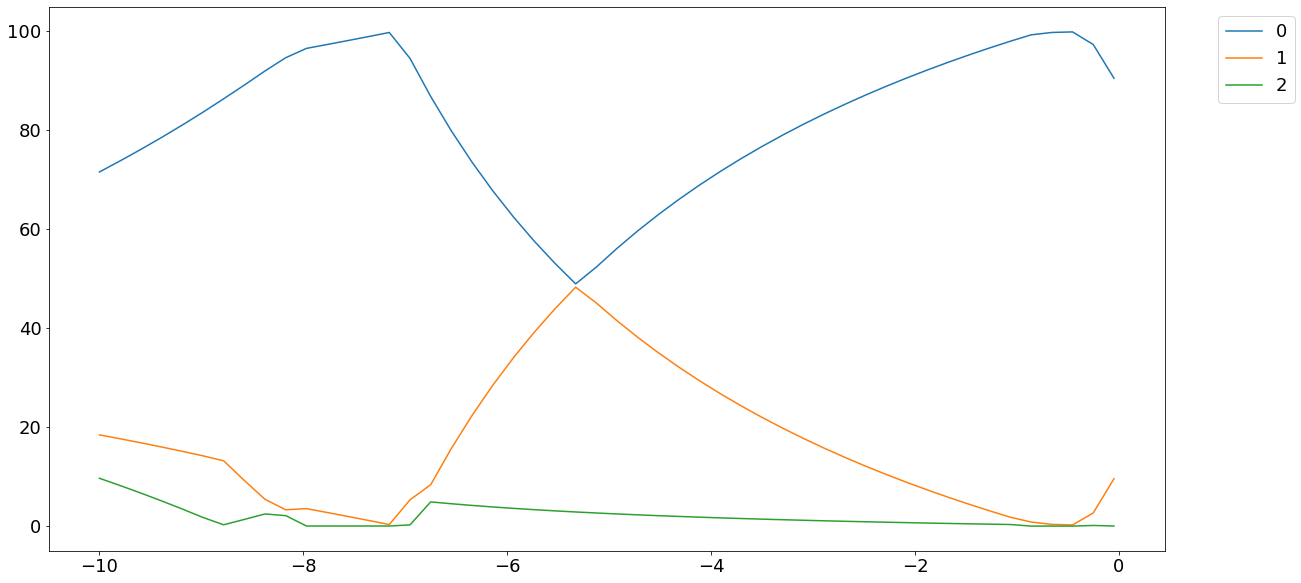

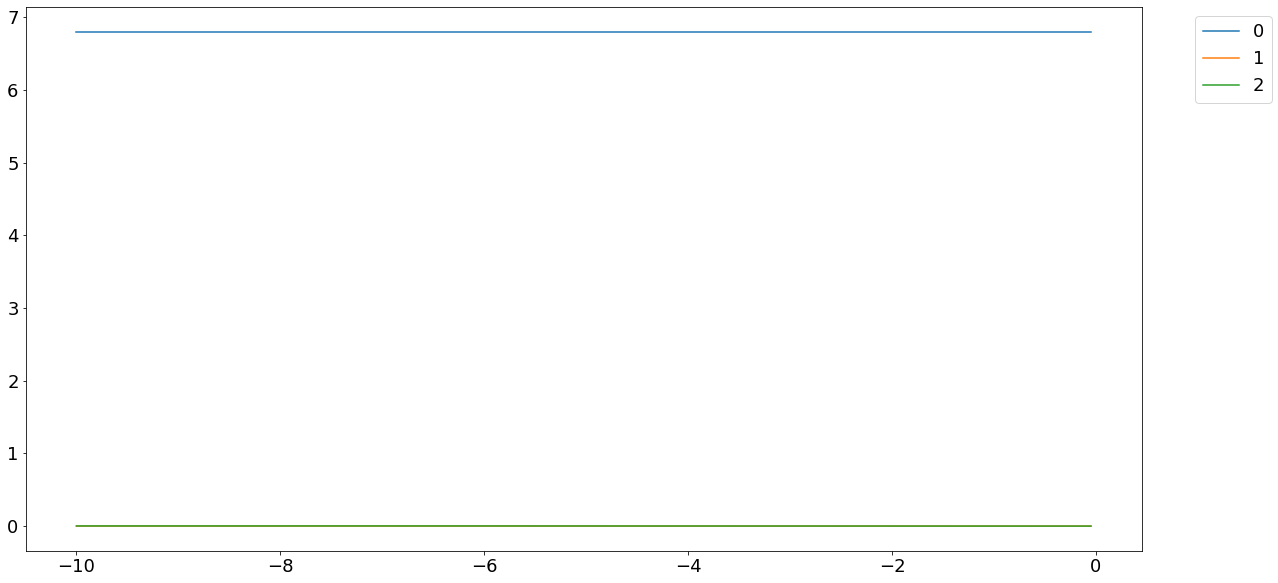

In [8]:
  
single_Model_comp   = ext.ModelComparison(modelDict=modelDict)
interm              = single_Model_comp.singleModellSummary(solutionDict,nrRea=3,resetIndexQual= True)

secre = getattr(interm.Secretion, 'C-Flux').unstack(level=1).dropna(axis=1,how='all')
secre.replace(0,np.nan).dropna(axis=1,how="all").plot(figsize =[20,10])
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#    print(interm)

uptake = getattr(interm.Uptake, 'flux').unstack(level=1).dropna(axis=1,how='all')
uptake.replace(0,np.nan).dropna(axis=1,how="all").plot(figsize =[20,10])
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")


